In [1]:
from astropy.io import fits
import numpy as np
import aplpy
import matplotlib.pyplot as plt
from scipy.ndimage import binary_closing
import sys
import warnings 
import colorcet as cc

sys.path.append('./../modules/')
warnings.filterwarnings('ignore')

from tools_contsub_misc import *
from tools_contsub_anchoring import * 
from tools_contsub_plots import *

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in" 

import warnings 
warnings.filterwarnings('ignore')

In [2]:
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.convolution import Gaussian2DKernel, convolve_fft

def get_smooth(hdu, x_stddev=3):
    
    hdu_new = hdu.copy()
    convolution_kernel = Gaussian2DKernel(x_stddev)
    smoothed_data = convolve_fft(hdu_new.data, convolution_kernel, allow_huge=True)
    hdu_new = fits.PrimaryHDU(np.array(smoothed_data, dtype=np.float32), hdu_new.header)

    return(hdu_new)

def get_croppeddata(hdu, ra, dec, size, smooth=False):

    wcs = WCS(hdu)  
    position = SkyCoord(ra=ra, dec=dec, frame='icrs')
    cutout = Cutout2D(hdu.data, position, [size*2.1, size*2.1], wcs=wcs)  
    hdu_crop = fits.PrimaryHDU(cutout.data, cutout.wcs.to_header())
    
    if smooth:
        hdu_crop = get_smooth(hdu_crop)

    del hdu, cutout
    return (hdu_crop)  

In [3]:
galaxy = 'ngc628c'
galaxy_muse = 'ngc0628'
rootdir = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/%s/' %galaxy
rootdir_bp = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/' 
run_cleanup = True

narrowband_filter = 'f658n'
instrument_f555w  = 'acs'
instrument_f65Xn = 'acs'
instrument_f814w = 'acs'

# Take the anchored version, careful of name change in variable
hdu_muse_stars      = get_hdu(rootdir, 'muse/%s_starmask.fits' %galaxy_muse.upper())
hdu_muse_neb        = get_hdu(rootdir, 'muse/%s_nebmask.fits' %galaxy_muse.upper())
hdu_muse            = get_hdu(rootdir, 'muse/%s*_MAPS.fits' %galaxy_muse.upper(), 'all')
hdu_muse_ha         = hdu_muse['HA6562_FLUX']
hdu_muse_f555w      = get_hdu(rootdir, 'hst_contsub/%s_muse_f555w.fits' %galaxy)
hdu_muse_f65Xn      = get_hdu(rootdir, 'hst_contsub/%s_muse_%s.fits' %(galaxy, narrowband_filter))
hdu_muse_f814w      = get_hdu(rootdir, 'hst_contsub/%s_muse_f814w.fits' %galaxy )
hdu_hst_f555w       = get_hdu(rootdir, 'hst_contsub/%s_hst_f555w.fits' %galaxy)
hdu_hst_f65Xn       = get_hdu(rootdir, 'hst_contsub/%s_hst_%s.fits' %(galaxy, narrowband_filter))
hdu_hst_f814w       = get_hdu(rootdir, 'hst_contsub/%s_hst_f814w.fits' %galaxy)
hdu_hst_ha          = get_hdu(rootdir, 'hst_contsub/%s_hst_ha.fits' %galaxy)
hdu_hst_an_cont     = get_hdu(rootdir, 'hst_contsub/%s_hst_%s_an_cont.fits' %(galaxy, narrowband_filter))
hdu_hst_an_contsub  = get_hdu(rootdir, 'hst_contsub/%s_hst_%s_an_contsub.fits' %(galaxy, narrowband_filter))
hdu_muse_contsub    = get_hdu(rootdir, 'hst_contsub/%s_muse_%s_contsub.fits' %(galaxy, narrowband_filter))
hdu_hst_f555w_smre  = get_hdu(rootdir, 'hst_contsub/%s_hst_f555w_smre.fits' %galaxy)
hdu_hst_f65Xn_smre  = get_hdu(rootdir, 'hst_contsub/%s_hst_%s_smre.fits' %(galaxy, narrowband_filter))
hdu_hst_f814w_smre  = get_hdu(rootdir, 'hst_contsub/%s_hst_f814w_smre.fits' %galaxy)
hdu_hst_f555w_an    = get_hdu(rootdir, 'hst_contsub/%s_hst_f555w_an.fits' %galaxy) 
hdu_hst_f65Xn_an    = get_hdu(rootdir, 'hst_contsub/%s_hst_%s_an.fits' %(galaxy, narrowband_filter)) 
hdu_hst_f814w_an    = get_hdu(rootdir, 'hst_contsub/%s_hst_f814w_an.fits' %galaxy) 
hdu_hst_f65Xn_anf    = get_hdu(rootdir, 'hst_contsub/%s_hst_%s_anf.fits' %(galaxy, narrowband_filter)) 

/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/muse/NGC0628_starmask.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/muse/NGC0628_nebmask.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/muse/NGC0628-0.92asec_MAPS.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/hst_contsub/ngc628c_muse_f555w.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/hst_contsub/ngc628c_muse_f658n.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/hst_contsub/ngc628c_muse_f814w.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/hst_contsub/ngc628c_hst_f555w.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/hst_contsub/ngc628c_hst_f658n.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/hst_contsub/ngc628c_hst_f814w.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/hs

In [4]:
def get_mask(hdu):
    mask = ~np.isnan(hdu.data)*1
    mask_close = binary_closing(mask, structure=np.ones((10,10)), iterations=1)
    mask_hdu = fits.PrimaryHDU(np.int32(mask_close*1), hdu.header)
    return(mask_hdu) 

hdu_mask = get_mask(hdu_hst_f555w_smre)

ra = 24.1564851 *u.deg
dec = 15.7763988 *u.deg
size = 0.0078978 *u.deg

bbox = dict(facecolor='whitesmoke',  alpha=0.95, boxstyle='round')

In [5]:
# Crop data to zoom region...

hdu_crop            = get_croppeddata(hdu_hst_f555w, ra, dec, size)
hdu_muse_stars      = get_croppeddata(hdu_muse_stars, ra, dec, size)
hdu_muse_neb        = get_croppeddata(hdu_muse_neb, ra, dec, size)
# hdu_muse            = get_croppeddata(hdu_muse, ra, dec, size)
hdu_muse_ha         = get_croppeddata(hdu_muse_ha, ra, dec, size)
hdu_muse_f555w      = get_croppeddata(hdu_muse_f555w, ra, dec, size)
hdu_muse_f65Xn      = get_croppeddata(hdu_muse_f65Xn, ra, dec, size)
hdu_muse_f814w      = get_croppeddata(hdu_muse_f814w, ra, dec, size)
hdu_hst_f555w       = get_croppeddata(hdu_hst_f555w, ra, dec, size, True)
hdu_hst_f65Xn       = get_croppeddata(hdu_hst_f65Xn, ra, dec, size, True)
hdu_hst_f814w       = get_croppeddata(hdu_hst_f814w, ra, dec, size, True)
hdu_hst_ha          = get_croppeddata(hdu_hst_ha, ra, dec, size, True)
hdu_hst_an_cont     = get_croppeddata(hdu_hst_an_cont, ra, dec, size, True)
hdu_hst_an_contsub  = get_croppeddata(hdu_hst_an_contsub, ra, dec, size, True)
hdu_muse_contsub    = get_croppeddata(hdu_muse_contsub, ra, dec, size)
hdu_hst_f555w_smre  = get_croppeddata(hdu_hst_f555w_smre, ra, dec, size)
hdu_hst_f65Xn_smre  = get_croppeddata(hdu_hst_f65Xn_smre, ra, dec, size)
hdu_hst_f814w_smre  = get_croppeddata(hdu_hst_f814w_smre, ra, dec, size)
hdu_hst_f555w_an    = get_croppeddata(hdu_hst_f555w_an, ra, dec, size, True)
hdu_hst_f65Xn_an    = get_croppeddata(hdu_hst_f65Xn_an, ra, dec, size, True)
hdu_hst_f814w_an    = get_croppeddata(hdu_hst_f814w_an, ra, dec, size, True)
hdu_hst_f65Xn_anf    = get_croppeddata(hdu_hst_f65Xn_anf, ra, dec, size, True)


In [6]:
# Update units and scaling... 

hdus = [
        hdu_hst_f555w, hdu_hst_f65Xn, hdu_hst_f814w,
        hdu_hst_f555w_smre, hdu_hst_f65Xn_smre, hdu_hst_f814w_smre,
        hdu_muse_f555w, hdu_muse_f65Xn, hdu_muse_f814w, 
        hdu_hst_f555w_an, hdu_hst_f65Xn_an, hdu_hst_f814w_an,
        hdu_hst_f65Xn_anf,
        hdu_hst_an_cont, hdu_hst_an_contsub, 
        hdu_hst_ha, hdu_muse_contsub, hdu_muse_ha,
        ]

for i, hdu in enumerate(hdus):

    hdu.data[hdu.data==0] = np.nan

    try: 
        pix_size = (hdu.header['PC1_1']*u.deg).to('arcsec')
        pix_size = abs(pix_size.value)
    except:
        pix_size = (hdu.header['CDELT1']*u.deg).to('arcsec')
        pix_size = abs(pix_size.value)

    print(f'{i} - Pix size: ', pix_size)

    pix_area = pix_size**2
    hdu.data = hdu.data / pix_area

0 - Pix size:  0.039619999999998004
1 - Pix size:  0.039619999999998004
2 - Pix size:  0.039619999999998004
3 - Pix size:  0.2000000000000016
4 - Pix size:  0.2000000000000016
5 - Pix size:  0.2000000000000016
6 - Pix size:  0.2000000000000016
7 - Pix size:  0.2000000000000016
8 - Pix size:  0.2000000000000016
9 - Pix size:  0.039619999999998004
10 - Pix size:  0.039619999999998004
11 - Pix size:  0.039619999999998004
12 - Pix size:  0.039619999999998004
13 - Pix size:  0.039619999999998004
14 - Pix size:  0.039619999999998004
15 - Pix size:  0.039619999999998004
16 - Pix size:  0.2000000000000016
17 - Pix size:  0.2000000000000016


In [20]:
# Deinfe colours
cmap1 = plt.cm.binary(np.linspace(0, 1, 32))
cmap2 = colorcet.cm.fire(np.linspace(0, 1, 256))
cmaplist = np.vstack((cmap1, cmap2))
cmap_map = mpl.colors.LinearSegmentedColormap.from_list('my_colormap', cmaplist)
cmap_map.set_under(cmap_map(0))
cmap_map.set_bad(color=cmap_map(0))

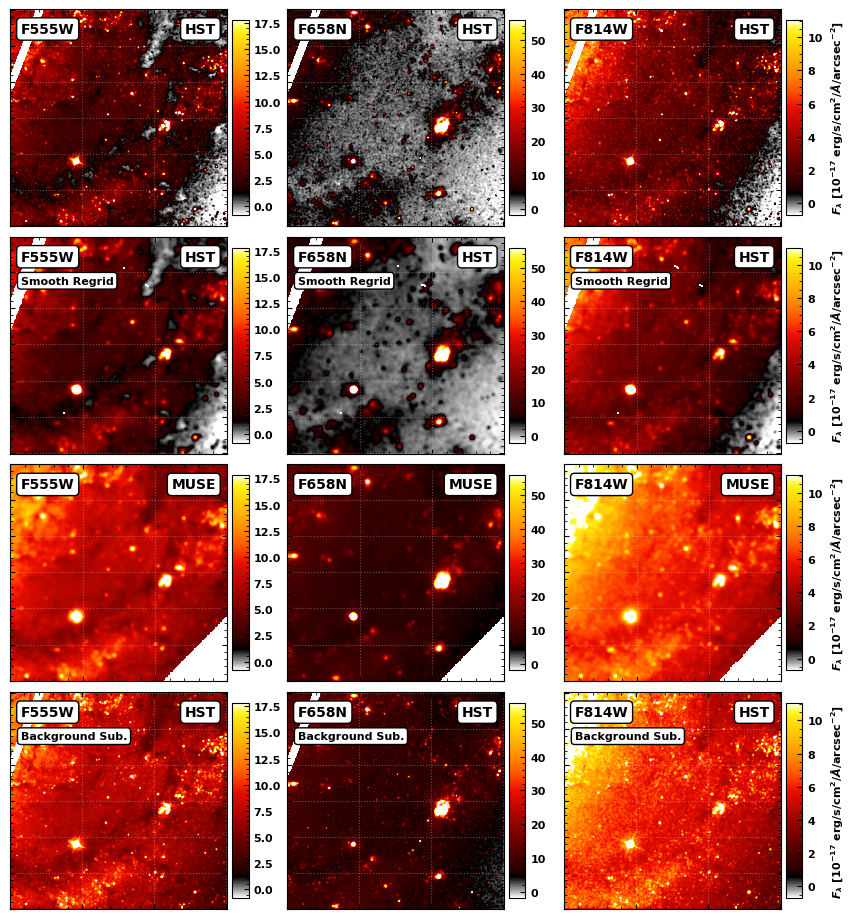

In [ ]:
# Maps anchor 

label = [
         'HST F555W', 'HST F658N', 'HST F814W',
         'HST F555W Smooth Regrid', 'HST F658N Smooth Regrid', 'HST F814W Smooth Regrid',
         'MUSE F555W', 'MUSE F658N', 'MUSE F814W',
         'HST F555W Background Sub.', 'HST F658N Background Sub.', 'HST F814W Background Sub.',
         ]

hdus = [
        hdu_hst_f555w, hdu_hst_f65Xn, hdu_hst_f814w,
        hdu_hst_f555w_smre, hdu_hst_f65Xn_smre, hdu_hst_f814w_smre,
        hdu_muse_f555w, hdu_muse_f65Xn, hdu_muse_f814w, 
        hdu_hst_f555w_an, hdu_hst_f65Xn_an, hdu_hst_f814w_an,
        ]

fig = plt.figure(figsize=(10, 10))
fig.tight_layout(h_pad=0, w_pad=0)
fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=-0.2, hspace=0.05)

vmin = np.ones(3)
vmax = np.ones(3)
vmin[0], vmax[0] = np.nanpercentile(hdus[0].data, (1, 99.5))
vmin[1], vmax[1] = np.nanpercentile(hdus[1].data, (0.5, 99.5))
vmin[2], vmax[2] = np.nanpercentile(hdus[2].data, (1, 99.5))

for i, hdu_ in enumerate(hdus):

    factor = 1e2

    hdu = hdu_.copy()
    hdu.data = hdu.data / factor

    # ax = fig.add_subplot(4, 3, i+1, projection=WCS(hdu.header))
    ax = fig.add_subplot(4, 3, i+1)

    col = i % 3
    row = i // 3

    # im1 = ax.imshow(hdu.data, cmap='cet_fire', origin='lower', vmin=vmin[col]/factor, vmax=vmax[col]/factor)
    im1 = ax.imshow(hdu.data, cmap=cmap_map, origin='lower', vmin=vmin[col]/factor, vmax=vmax[col]/factor)

    try:

        ra = ax.coords[0]
        dec = ax.coords[1]

        ra.display_minor_ticks(True)
        dec.display_minor_ticks(True)

        ax.tick_params(axis='x', which='both', bottom=True, top=True, left=True, right=True)
        ax.tick_params(axis='y', which='both', bottom=True, top=True, left=True, right=True)
        ax.tick_params(axis='x', labelbottom=False, labelleft=False, labelright=False, labeltop=False)
        ax.tick_params(axis='y', labelbottom=False, labelleft=False, labelright=False, labeltop=False)

    except:

        ax.set_xticklabels([])
        ax.set_yticklabels([])

    ax.text(0.05, 0.94, label[i].split(' ')[1], transform=ax.transAxes, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=10, ha='left', va='top')
    ax.text(0.05, 0.82, ' '.join(label[i].split(' ')[2:]), transform=ax.transAxes, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=8, ha='left', va='top')
    ax.text(0.95, 0.94, label[i].split(' ')[0], transform=ax.transAxes, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=10, ha='right', va='top')

    ax.grid(True, alpha=0.3, ls=':', color='white')

    pos = ax.get_position()
    cax = fig.add_axes([pos.x1+pos.width*0.025, pos.y0+pos.height*0.05, pos.width*0.075, pos.height-pos.height*0.1])
    cbar = fig.colorbar(im1, cax=cax, orientation='vertical')
    cbar.ax.tick_params(axis='both', which='major', labelsize=8)

    if col == 2: 
        # ax.colorbar.set_axis_label_text('log($F_\lambda$) log$_{10}$(erg/s/cm$^2$/$\AA$/pixel)')
        cbar.set_label('$F_\lambda$ [10$^{-18}$ erg/s/cm$^2$/$\AA$/arcsec$^{-2}$]', fontsize=8)

fig.savefig('./figs/%s_maps_anchor.pdf' %galaxy, bbox_inches='tight', dpi=150)  

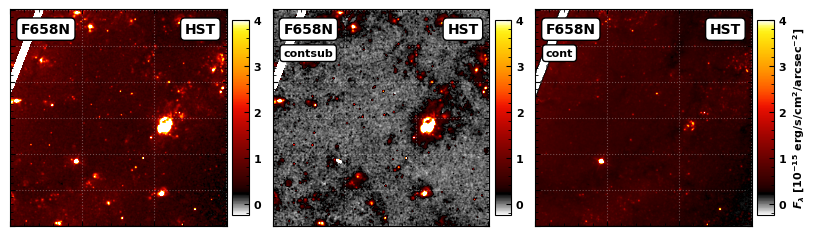

In [25]:
# Maps contsub
# smooth_factor=3
# resolution = 0.07*u.arcsec
# hdu_hst_an_contsub_sm = get_smooth(hdu_hst_an_contsub, resolution, resolution*smooth_factor)

hdus = [
        hdu_hst_f65Xn_anf, hdu_hst_an_contsub, hdu_hst_an_cont,
        ]

label = ['HST F658N', 'HST F658N contsub', 'HST F658N cont']

fig = plt.figure(figsize=(10, 10))
fig.tight_layout(h_pad=0, w_pad=0)
fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=-0.3, hspace=0.05)

vmin = np.ones(3)
vmax = np.ones(3)
vmin[0], vmax[0] = np.nanpercentile(hdus[0].data, (0.05, 99.5))
# vmin[1], vmax[1] = np.nanpercentile(hdus[1].data, (0.5, 99.5))
# vmin[2], vmax[2] = np.nanpercentile(hdus[2].data, (1, 99.5))
vmin[0], vmax[0] = -0.25*1e5, 4*1e5


for i, hdu_ in enumerate(hdus):

    factor = 1e5
    hdu = hdu_.copy()
    hdu.data = hdu.data / factor

    # ax = fig.add_subplot(4, 3, i+1, projection=WCS(hdu.header))
    ax = fig.add_subplot(4, 3, i+1)

    col = i % 3
    row = i // 3

    im1 = ax.imshow(hdu.data, cmap=cmap_map, origin='lower', vmin=vmin[0]/factor, vmax=vmax[0]/factor)

    try:

        ra = ax.coords[0]
        dec = ax.coords[1]

        ra.display_minor_ticks(True)
        dec.display_minor_ticks(True)

        ax.tick_params(axis='x', which='both', bottom=True, top=True, left=True, right=True)
        ax.tick_params(axis='y', which='both', bottom=True, top=True, left=True, right=True)
        ax.tick_params(axis='x', labelbottom=False, labelleft=False, labelright=False, labeltop=False)
        ax.tick_params(axis='y', labelbottom=False, labelleft=False, labelright=False, labeltop=False)

    except:

        ax.set_xticklabels([])
        ax.set_yticklabels([])

    ax.text(0.05, 0.94, label[i].split(' ')[1], transform=ax.transAxes, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=10, ha='left', va='top')
    ax.text(0.05, 0.82, ' '.join(label[i].split(' ')[2:]), transform=ax.transAxes, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=8, ha='left', va='top')
    ax.text(0.95, 0.94, label[i].split(' ')[0], transform=ax.transAxes, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=10, ha='right', va='top')

    ax.grid(True, alpha=0.3, ls=':', color='white')

    pos = ax.get_position()
    cax = fig.add_axes([pos.x1+pos.width*0.025, pos.y0+pos.height*0.05, pos.width*0.075, pos.height-pos.height*0.1])
    cbar = fig.colorbar(im1, cax=cax, orientation='vertical')
    cbar.ax.tick_params(axis='both', which='major', labelsize=8)

    if col == 2: 
        cbar.set_label('$F_\lambda$ [10$^{-15}$ erg/s/cm$^2$/arcsec$^{-2}$]', fontsize=8)

fig.savefig('./figs/%s_maps_contsub.pdf' %galaxy, bbox_inches='tight', dpi=300)  

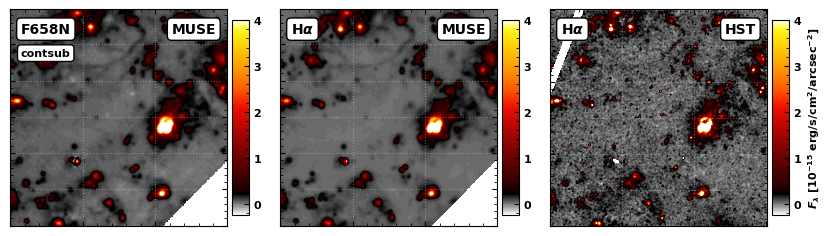

In [26]:
# Maps contsub anchor 
# smooth_factor=3
# resolution = 0.07*u.arcsec
# hdu_hst_ha_sm = get_smooth(hdu_hst_an_contsub, resolution, resolution*smooth_factor)

hdus = [
        hdu_muse_contsub, hdu_muse_ha, hdu_hst_ha,
        ]

label = ['MUSE F658N contsub', r'MUSE H$\alpha$', r'HST H$\alpha$']

fig = plt.figure(figsize=(10, 10))
fig.tight_layout(h_pad=0, w_pad=0)
fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=-0.25, hspace=0.05)

vmin = np.ones(3)
vmax = np.ones(3)
# vmin[0], vmax[0] = np.nanpercentile(hdus[0].data, (0.0025, 99.75))
# vmin[1], vmax[1] = np.nanpercentile(hdus[1].data, (5, 99.5))
# vmin[2], vmax[2] = np.nanpercentile(hdus[2].data, (5, 99.5))
vmin[0], vmax[0] = -0.25*1e5, 4*1e5

for i, hdu_ in enumerate(hdus):

    factor = 1e5
    hdu = hdu_.copy()
    hdu.data = hdu.data / factor

    # ax = fig.add_subplot(4, 3, i+1, projection=WCS(hdu.header))
    ax = fig.add_subplot(4, 3, i+1)

    col = i % 3
    row = i // 3

    im1 = ax.imshow(hdu.data, cmap=cmap_map, origin='lower', vmin=vmin[0]/factor, vmax=vmax[0]/factor)

    try:

        ra = ax.coords[0]
        dec = ax.coords[1]

        ra.display_minor_ticks(True)
        dec.display_minor_ticks(True)

        ax.tick_params(axis='x', which='both', bottom=True, top=True, left=True, right=True)
        ax.tick_params(axis='y', which='both', bottom=True, top=True, left=True, right=True)
        ax.tick_params(axis='x', labelbottom=False, labelleft=False, labelright=False, labeltop=False)
        ax.tick_params(axis='y', labelbottom=False, labelleft=False, labelright=False, labeltop=False)

    except:

        ax.set_xticklabels([])
        ax.set_yticklabels([])

    ax.text(0.05, 0.94, label[i].split(' ')[1], transform=ax.transAxes, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=10, ha='left', va='top')
    ax.text(0.05, 0.82, ' '.join(label[i].split(' ')[2:]), transform=ax.transAxes, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=8, ha='left', va='top')
    ax.text(0.95, 0.94, label[i].split(' ')[0], transform=ax.transAxes, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=10, ha='right', va='top')

    ax.grid(True, alpha=0.3, ls=':', color='white')

    pos = ax.get_position()
    cax = fig.add_axes([pos.x1+pos.width*0.025, pos.y0+pos.height*0.05, pos.width*0.075, pos.height-pos.height*0.1])
    cbar = fig.colorbar(im1, cax=cax, orientation='vertical')
    cbar.ax.tick_params(axis='both', which='major', labelsize=8)

    if col == 2: 
        cbar.set_label('$F_\lambda$ [10$^{-15}$ erg/s/cm$^2$/arcsec$^{-2}$]', fontsize=8)


fig.savefig('./figs/%s_maps_anchor_contsub.pdf' %galaxy, bbox_inches='tight', dpi=300)  